In [1]:
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv("admitted.csv")

In [65]:
df['y_pred'] = 0
df.head()

,first exam,second exam,is admitted,y_pred
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,0
4,79.032736,75.344376,1,0


In [4]:
def TP(df):
    tmp = df[(df['y_pred'] == 1) & (df['is admitted'] == 1)]
    return len(tmp) / len(df)

def TN(df):
    tmp = df[(df['y_pred'] == 0) & (df['is admitted'] == 0)]
    return len(tmp) / len(df)

def FP(df):
    tmp = df[(df['y_pred'] == 1) & (df['is admitted'] == 0)]
    return len(tmp) / len(df)

def FN(df):
    tmp = df[(df['y_pred'] == 0) & (df['is admitted'] == 1)]
    return len(tmp) / len(df)

In [5]:
def recall(df):
    _TP = TP(df)
    _FN = FN(df)
    if _TP == 0:
        return 0
    return _TP / (_TP + _FN)

def precision(df):
    _TP = TP(df)
    _FP = FP(df)
    if _TP == 0:
        return 0
    return _TP / (_TP + _FP)

In [66]:
df['y_pred'] = 1
print(recall(df))

1.0


In [179]:
for k in range(9700):
    df.loc['y_pred'] = 1

In [182]:
print(precision(df))

1.0


In [56]:
df['y_pred'] = df['is admitted']
print(precision(df))
print(recall(df))

1.0
1.0


In [148]:
df['y_pred'] = 0

In [161]:
df1 = df[:100]
df1.loc[:85, 'y_pred'] = 1
df1.loc[85:, 'y_pred'] = 0

In [162]:
df.head()
print(precision(df), recall(df))

0.5647058823529412 0.8


In [163]:
print(f_score(precision(df), recall(df)))

0.6620689655172414


In [81]:
print(df1.head())

   first exam  second exam  is admitted  y_pred
0   34.623660    78.024693            0       0
1   30.286711    43.894998            0       0
2   35.847409    72.902198            0       0
3   60.182599    86.308552            1       0
4   79.032736    75.344376            1       0


In [183]:
df2 = df[:100]
df2.loc[:72, 'y_pred'] = 0
df2.loc[72:, 'y_pred'] = 1

In [184]:
df2.head()
print(precision(df2), recall(df2))

0.8214285714285714 0.38333333333333336


In [185]:
print(f_score_beta(precision(df2), recall(df2), beta=2))

0.7723880597014926


In [164]:
def f_score_beta(precision, recall, beta=1):
    return (1 + beta) ** 2 * precision * recall / (precision * beta ** 2 + recall)

In [68]:
df['y_pred'] = 0
print(recall(df))

0


In [95]:
def f_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

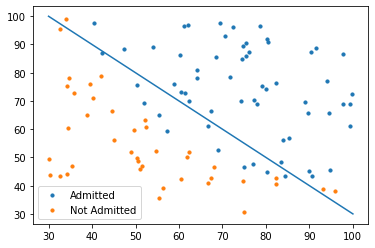

In [9]:
import matplotlib.pyplot as plt
x_values = [30, 100]
y_values = [100, 30]


X = df.iloc[:, :-1]   
y = df.iloc[:, -1]

admitted = df.loc[y == 1]
not_admitted = df.loc[y == 0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.plot(x_values, y_values)
plt.legend()
plt.show()
